<a href="https://colab.research.google.com/github/tynimattias/EENG440_Labs/blob/main/440_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


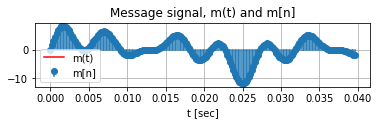

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

f = [30, 70, 150, 190]
Ts = 0.0002

n = np.arange(0,199,1)
t = Ts * n

message = np.zeros(199)
msgtemp = np.zeros(199)


for i in range(len(f)):
  for k in range(len(msgtemp)):
    msgtemp[k]=3*np.sin(2*np.pi*f[i]*t[k])
  message += msgtemp
  msgtemp = np.zeros(len(msgtemp))
  


Fig1 = plt.figure(1)
plt.subplot(311) 
plt.plot(t,message,'r-') 
plt.grid(True)
(markerline, stemlines, baseline) = plt.stem(t,message) 
plt.setp(baseline, visible=False)
plt.title('Message signal, m(t) and m[n]'); plt.xlabel('t [sec]')
plt.legend(('m(t)','m[n]'))
plt.rcParams['figure.figsize'] = [30, 20]



2. Transmitter design for DSB-SC AM

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


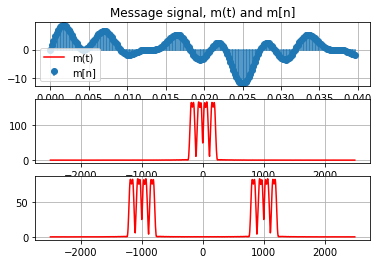

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive/')
import sys
sys.path.append('/content/gdrive/MyDrive/GoogleColab')
from CommunicationLib import DrawSpectrum

f = [30, 70, 150, 190]
Ts = 0.0002
n = np.arange(0,199,1)
t = Ts * n

message = np.zeros(199)
msgtemp = np.zeros(199)


for i in range(len(f)):
  for k in range(len(msgtemp)):
    msgtemp[k]=3*np.sin(2*np.pi*f[i]*t[k])
  message += msgtemp
  msgtemp = np.zeros(len(msgtemp))
  


fc = 1000 #HZ
wc = 2*np.pi*fc
ac = 1

ct = ac*np.cos(wc*t)

ut = message * ct

plt.subplot(311) 
plt.plot(t,message,'r-') 
plt.grid(True)
(markerline, stemlines, baseline) = plt.stem(t,message) 
plt.setp(baseline, visible=False)
plt.title('Message signal, m(t) and m[n]'); plt.xlabel('t [sec]')
plt.legend(('m(t)','m[n]'))

plt.rcParams['figure.figsize'] = [30, 20]


plt.subplot(312); DrawSpectrum(message, 1/Ts,'r-')
plt.subplot(313); DrawSpectrum(ut, 1/Ts,'r-')

3.	A receiver design for DSB-SC AM


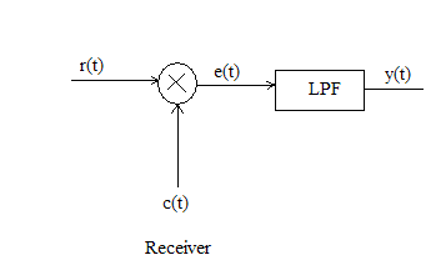

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


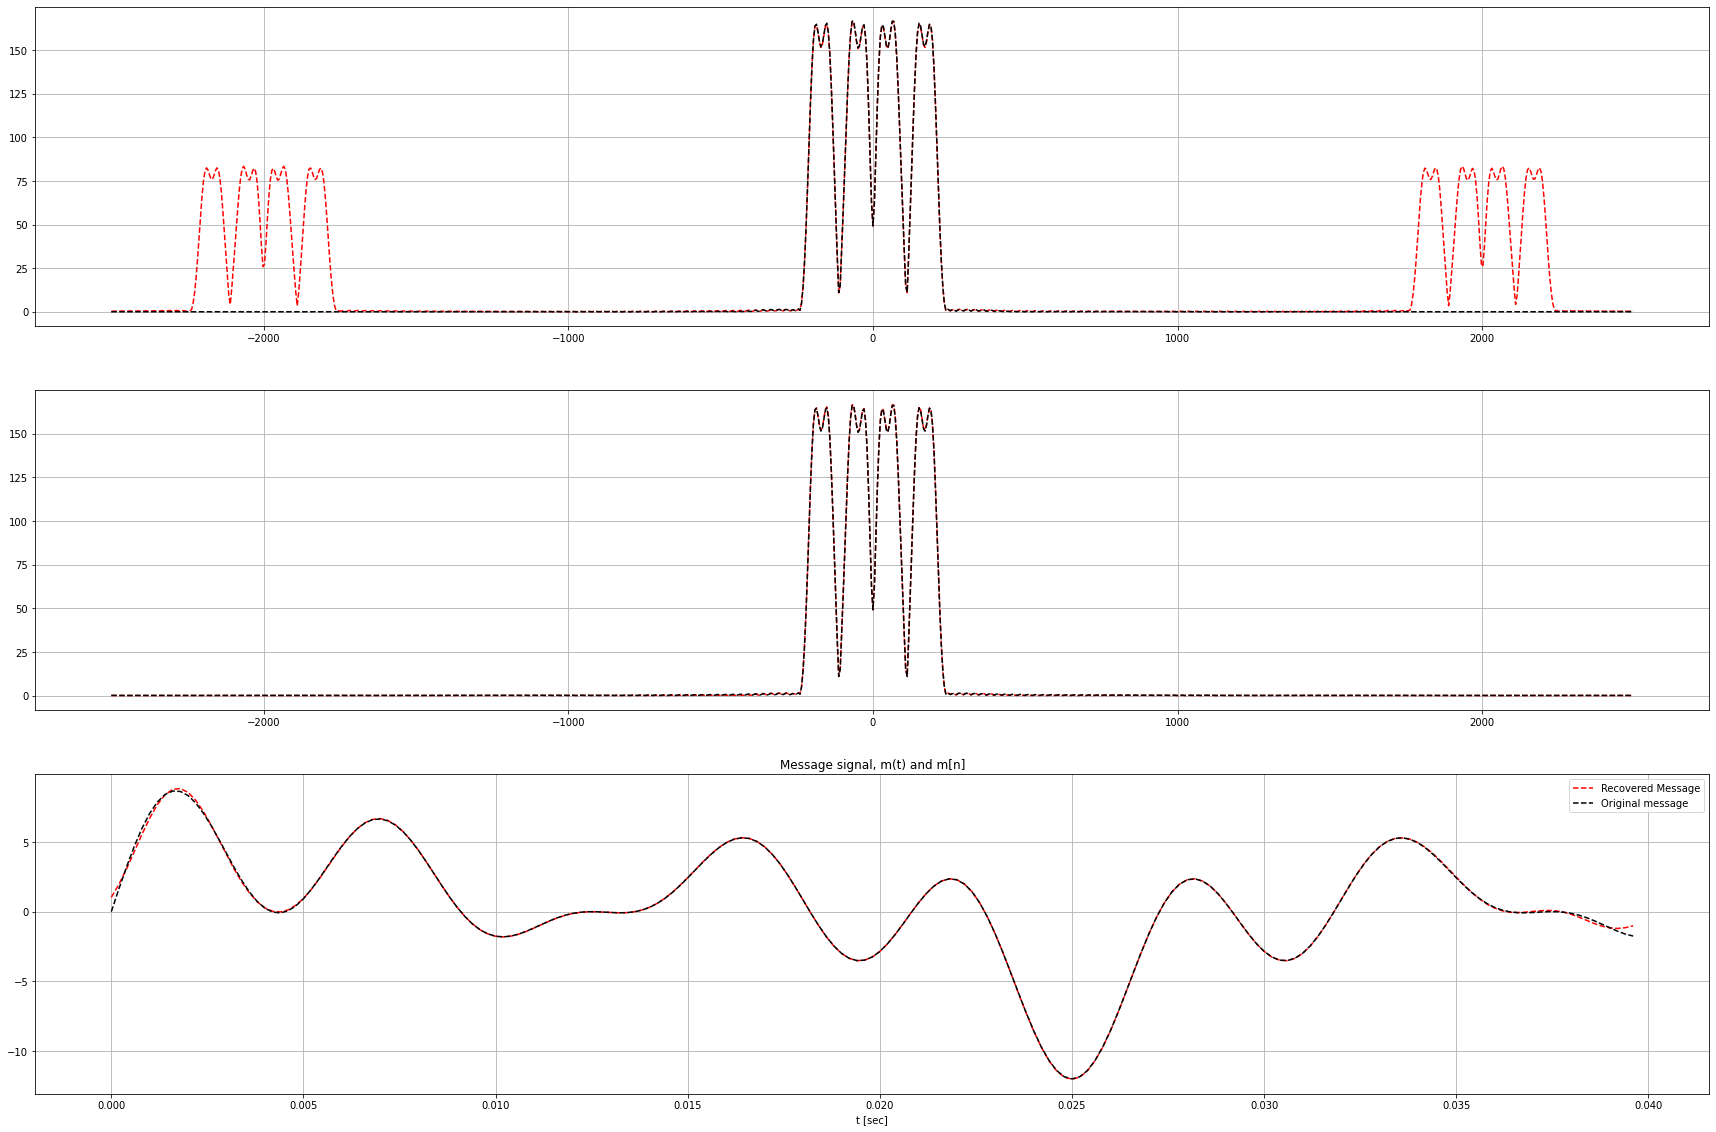

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive/')
import sys
sys.path.append('/content/gdrive/MyDrive/GoogleColab')
from CommunicationLib import DrawSpectrum
import scipy.signal as sci

f = [30, 70, 150, 190]
Ts = 0.0002
Fs = 1/Ts
n = np.arange(0,199,1)
t = Ts * n

message = np.zeros(199)
msgtemp = np.zeros(199)


for i in range(len(f)):
  for k in range(len(msgtemp)):
    msgtemp[k]=3*np.sin(2*np.pi*f[i]*t[k])
  message += msgtemp
  msgtemp = np.zeros(len(msgtemp))
  


fc = 1000 #HZ
wc = 2*np.pi*fc
ac = 1

ct = ac*np.cos(wc*t)

ut = message * ct

rt = ut

et = ct * ut *2



N=99; CutOffFreq=400
NyqFreq = Fs / 2 # Normalized freq = 1 is corresponding to Nyquist freq, fs/2
NormalizedCutOffFreq = CutOffFreq / NyqFreq
B = sci.firwin(N,NormalizedCutOffFreq)
A = np.array([1])

yt = sci.convolve(B,et) 
yt = yt[int(np.floor(N/2)):int(np.floor(N/2))+len(t)]


plt.subplot(311);
DrawSpectrum(et, Fs,'r--')
DrawSpectrum(yt, Fs,'k--')
plt.rcParams['figure.figsize'] = [30, 20]

plt.subplot(312)
DrawSpectrum(yt, Fs, 'r--')
DrawSpectrum(message, Fs, 'k--')


plt.subplot(313) 
plt.plot(t,yt,'r--',label = 'Recovered Message')
plt.plot(t,message, 'k--', label = 'Original message') 
plt.grid(True)


plt.title('Message signal, m(t) and m[n]');
plt.xlabel('t [sec]')
plt.legend()






4.	Investigate DSB-SC AM communication system more

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


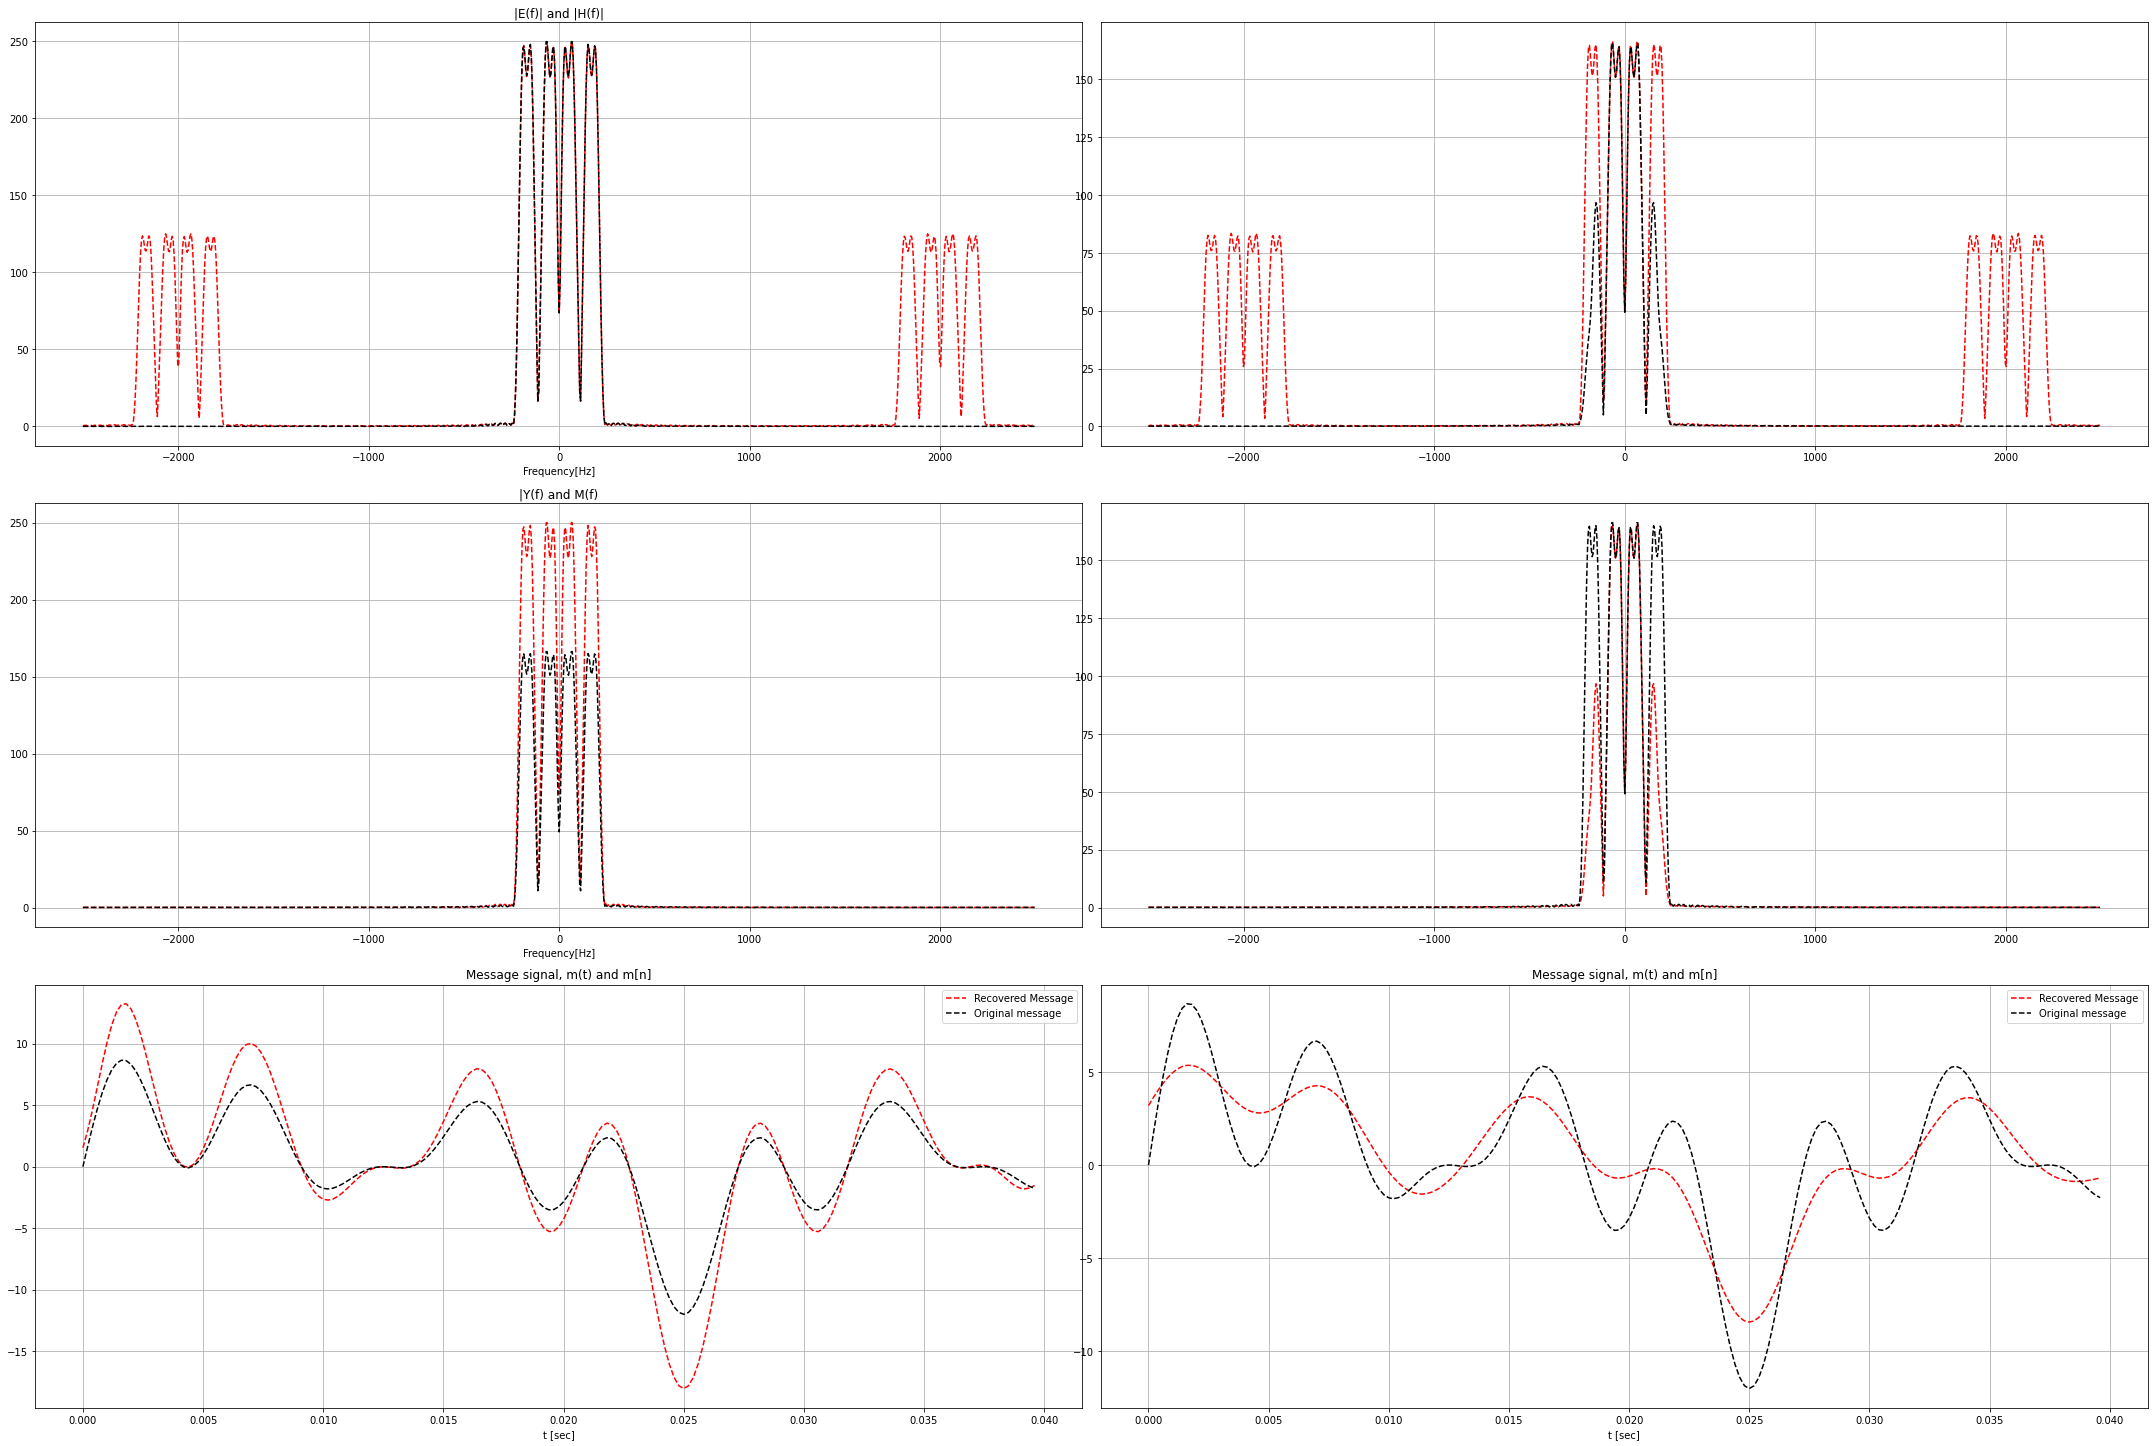

In [17]:
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive/')
import sys
sys.path.append('/content/gdrive/MyDrive/GoogleColab')
from CommunicationLib import DrawSpectrum
import scipy.signal as sci

f = [30, 70, 150, 190]
Ts = 0.0002
Fs = 1/Ts
n = np.arange(0,199,1)
t = Ts * n

message = np.zeros(199)
msgtemp = np.zeros(199)


for i in range(len(f)):
  for k in range(len(msgtemp)):
    msgtemp[k]=3*np.sin(2*np.pi*f[i]*t[k])
  message += msgtemp
  msgtemp = np.zeros(len(msgtemp))
  


fc = 1000 #HZ
wc = 2*np.pi*fc
ac = 1

ct = ac*np.cos(wc*t)

ut = message * ct

rt = ut

et = ct * ut * 3



N=99; CutOffFreq=400
NyqFreq = Fs / 2 # Normalized freq = 1 is corresponding to Nyquist freq, fs/2
NormalizedCutOffFreq = CutOffFreq / NyqFreq
B = sci.firwin(N,NormalizedCutOffFreq)
A = np.array([1])

yt = sci.convolve(B,et) 
yt = yt[int(np.floor(N/2)):int(np.floor(N/2))+len(t)]


plt.subplot(321);
plt.tight_layout()
DrawSpectrum(et, Fs,'r--')
DrawSpectrum(yt, Fs,'k--')
plt.title(r"|E(f)| and |H(f)|")
plt.xlabel('Frequency[Hz]')
plt.rcParams['figure.figsize'] = [30, 20]

plt.subplot(323)
plt.tight_layout()
plt.title(r"|Y(f) and M(f)")
plt.xlabel('Frequency[Hz]')
DrawSpectrum(yt, Fs, 'r--')
DrawSpectrum(message, Fs, 'k--')


plt.subplot(325) 
plt.tight_layout()
plt.plot(t,yt,'r--',label = 'Recovered Message')
plt.plot(t,message, 'k--', label = 'Original message')
plt.xlabel('Time[s]')
plt.grid(True)


plt.title('Message signal, m(t) and m[n]');
plt.xlabel('t [sec]')
plt.legend()




fc = 1000 #HZ
wc = 2*np.pi*fc
ac = 1

ct = ac*np.cos(wc*t)

ut = message * ct

rt = ut

et = ct * ut * 2



N=99; CutOffFreq=160
NyqFreq = Fs / 2 # Normalized freq = 1 is corresponding to Nyquist freq, fs/2
NormalizedCutOffFreq = CutOffFreq / NyqFreq
B = sci.firwin(N,NormalizedCutOffFreq)
A = np.array([1])

yt = sci.convolve(B,et) 
yt = yt[int(np.floor(N/2)):int(np.floor(N/2))+len(t)]




plt.subplot(322);
DrawSpectrum(et, Fs,'r--')
DrawSpectrum(yt, Fs,'k--')
plt.rcParams['figure.figsize'] = [30, 20]

plt.subplot(324)
DrawSpectrum(yt, Fs, 'r--')
DrawSpectrum(message, Fs, 'k--')


plt.subplot(326) 
plt.plot(t,yt,'r--',label = 'Recovered Message')
plt.plot(t,message, 'k--', label = 'Original message') 
plt.grid(True)


plt.title('Message signal, m(t) and m[n]');
plt.xlabel('t [sec]')
plt.legend()


